# GAP UP STRATEGY

C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(
[*********************100%***********************]  1 of 1 completed


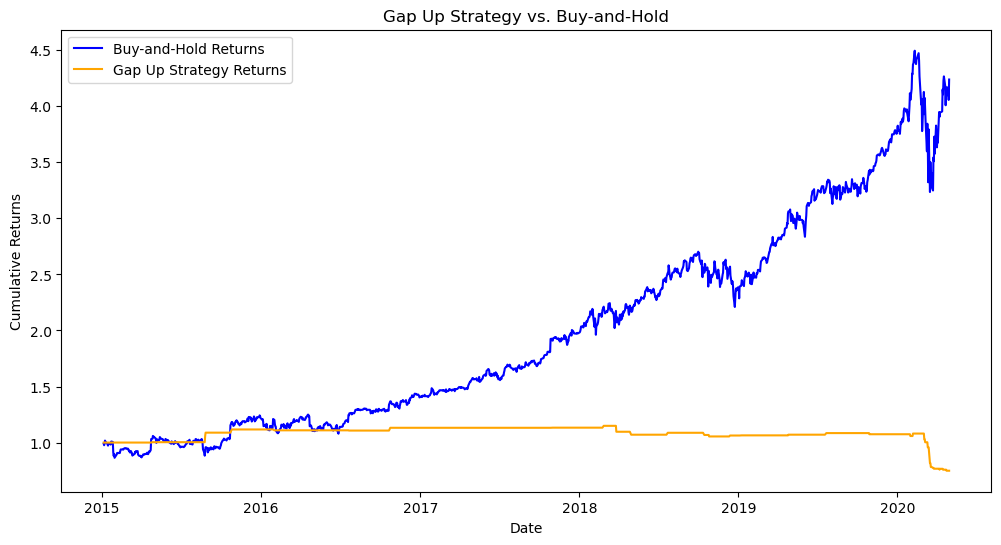

Buy and hold returns: 1.444129897108109
Strategy returns: -0.28930693855876655


C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
C:\Users\DEEL\anaconda3\lib\site-packages\empyrical\stats.py:1527: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \
C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2015-01-02
End date,2020-04-29
Total months,63
,Backtest
Annual return,-0.8%
Cumulative returns,-4.1%
Annual volatility,12.5%
Sharpe ratio,0.00
Calmar ratio,-0.04
Stability,0.23
Max drawdown,-21.3%


C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


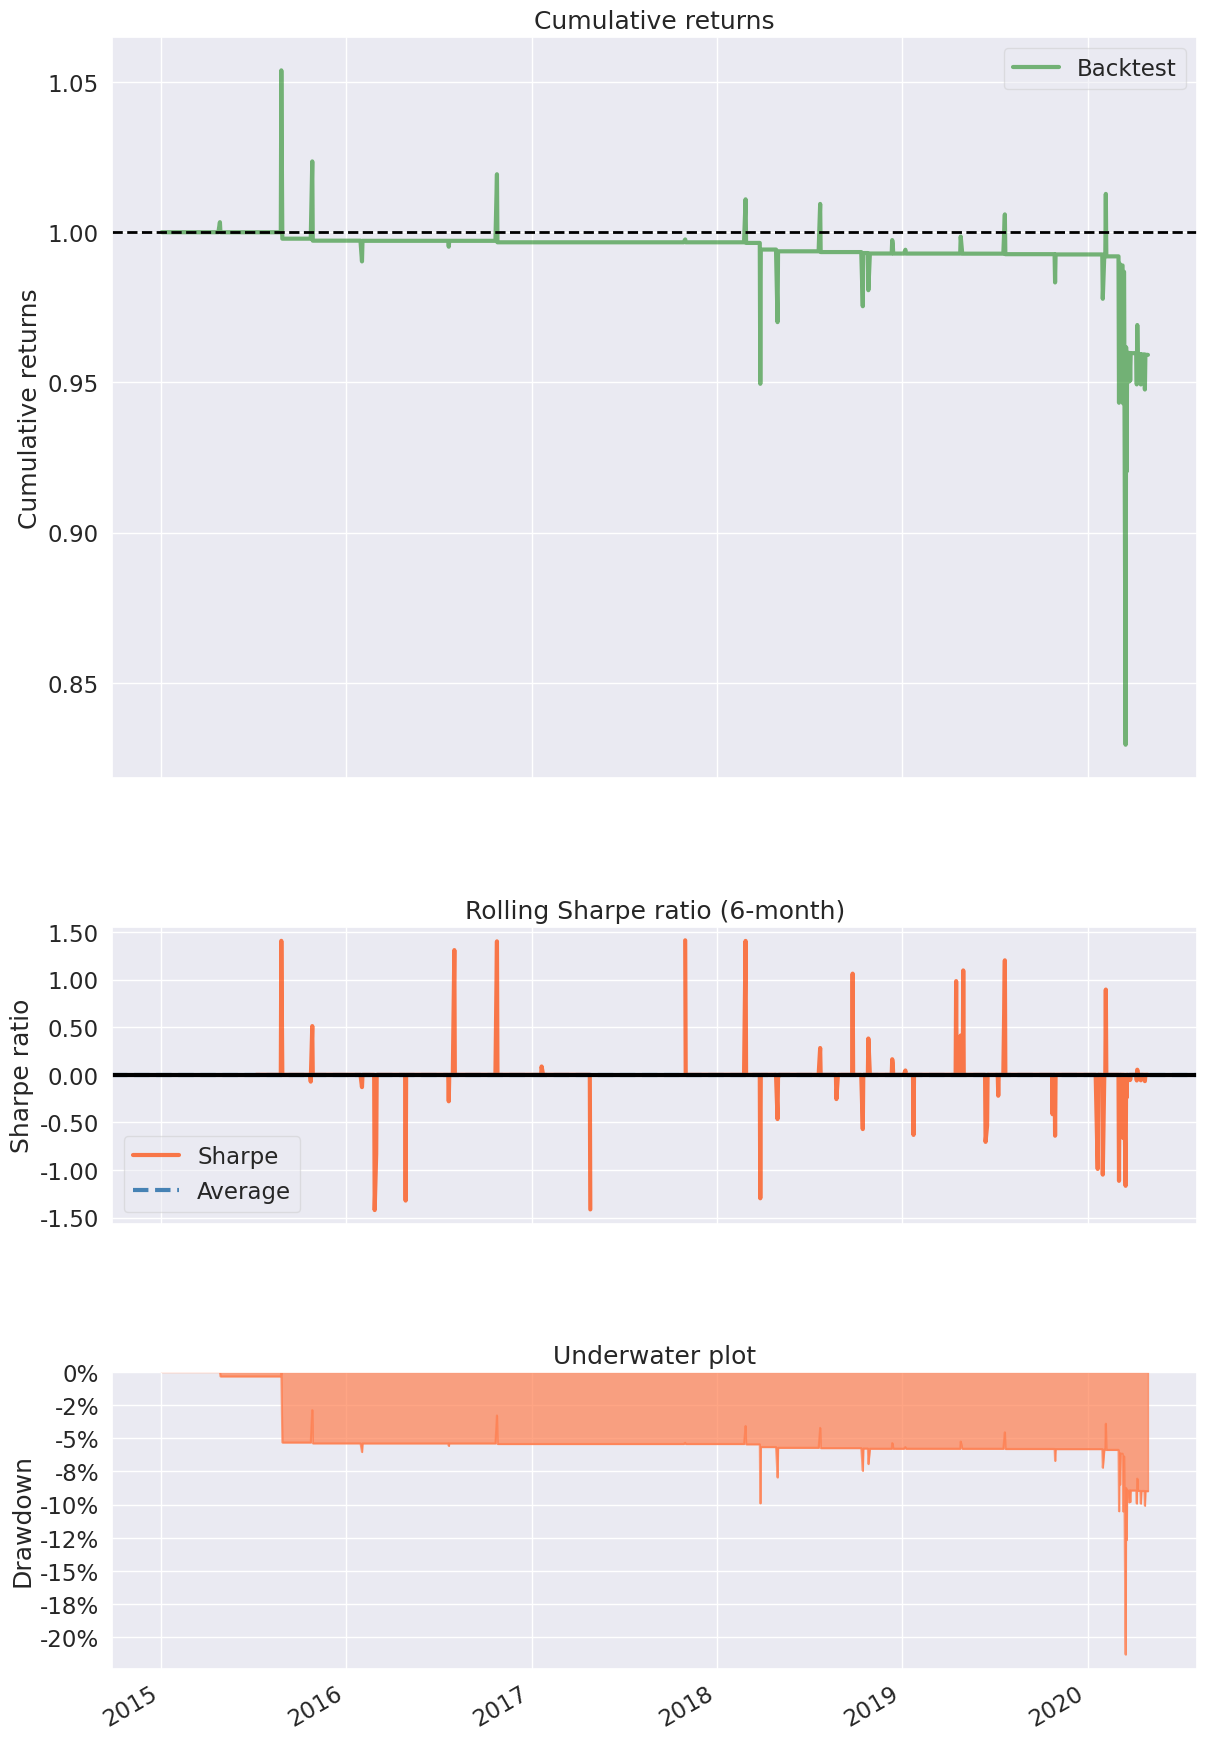

In [10]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyfolio as pf

# Define stock ticker, start date, and end date
ticker = 'MSFT'
start_date = '2015-01-02'
end_date = '2020-04-30'

# Download historical data for the selected stock
df = yf.download(ticker, start=start_date, end=end_date)

# Define a gap-up threshold (e.g., 2% gap up)
gap_up_threshold = 0.02  # 2%

# Calculate buy-and-hold daily log returns
df['bnh_returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# Identify gap-up days and generate buy signals
df['Gap_Up'] = np.where((df['Open'] > df['Close'].shift(1)) &
                        ((df['Open'] - df['Close'].shift(1)) / df['Close'].shift(1) >= gap_up_threshold), 1, 0)

# Shift the Gap_Up signal to create positions
df['Position'] = df['Gap_Up'].shift(1)

# Calculate returns based on Gap Up strategy
df['strategy_returns'] = df['Position'] * df['bnh_returns']

# Calculate cumulative returns for both buy-and-hold and the Gap Up strategy
df['cumulative_bnh_returns'] = df['bnh_returns'].cumsum().apply(np.exp)
df['cumulative_strategy_returns'] = df['strategy_returns'].cumsum().apply(np.exp)

# Plot cumulative returns for comparison
plt.figure(figsize=(12, 6))
plt.plot(df['cumulative_bnh_returns'], label='Buy-and-Hold Returns', color='blue')
plt.plot(df['cumulative_strategy_returns'], label='Gap Up Strategy Returns', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Gap Up Strategy vs. Buy-and-Hold')
plt.legend()
plt.show()

print("Buy and hold returns:",df['bnh_returns'].cumsum()[-1])
print("Strategy returns:",df['strategy_returns'].cumsum()[-1])
pf.create_simple_tear_sheet(df['strategy_returns'].diff())


# GAP DOWN STRATEGY 

[*********************100%***********************]  1 of 1 completed


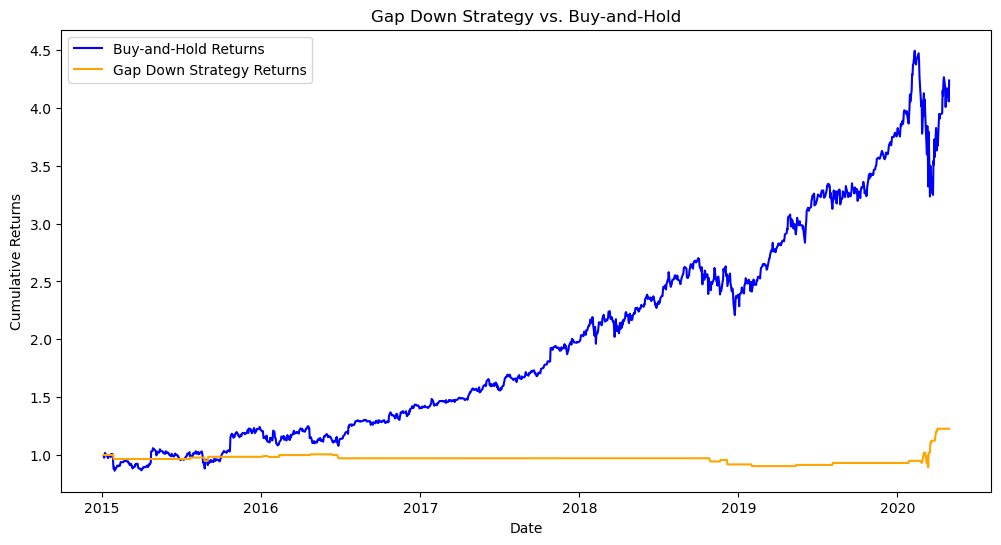

Buy and hold returns: 1.444129897108109
Strategy returns: 0.20429314156013254


C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
C:\Users\DEEL\anaconda3\lib\site-packages\empyrical\stats.py:1527: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \
C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2015-01-02
End date,2020-04-29
Total months,63
,Backtest
Annual return,-1.4%
Cumulative returns,-7.2%
Annual volatility,17.1%
Sharpe ratio,0.00
Calmar ratio,-0.08
Stability,0.14
Max drawdown,-16.8%


C:\Users\DEEL\anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


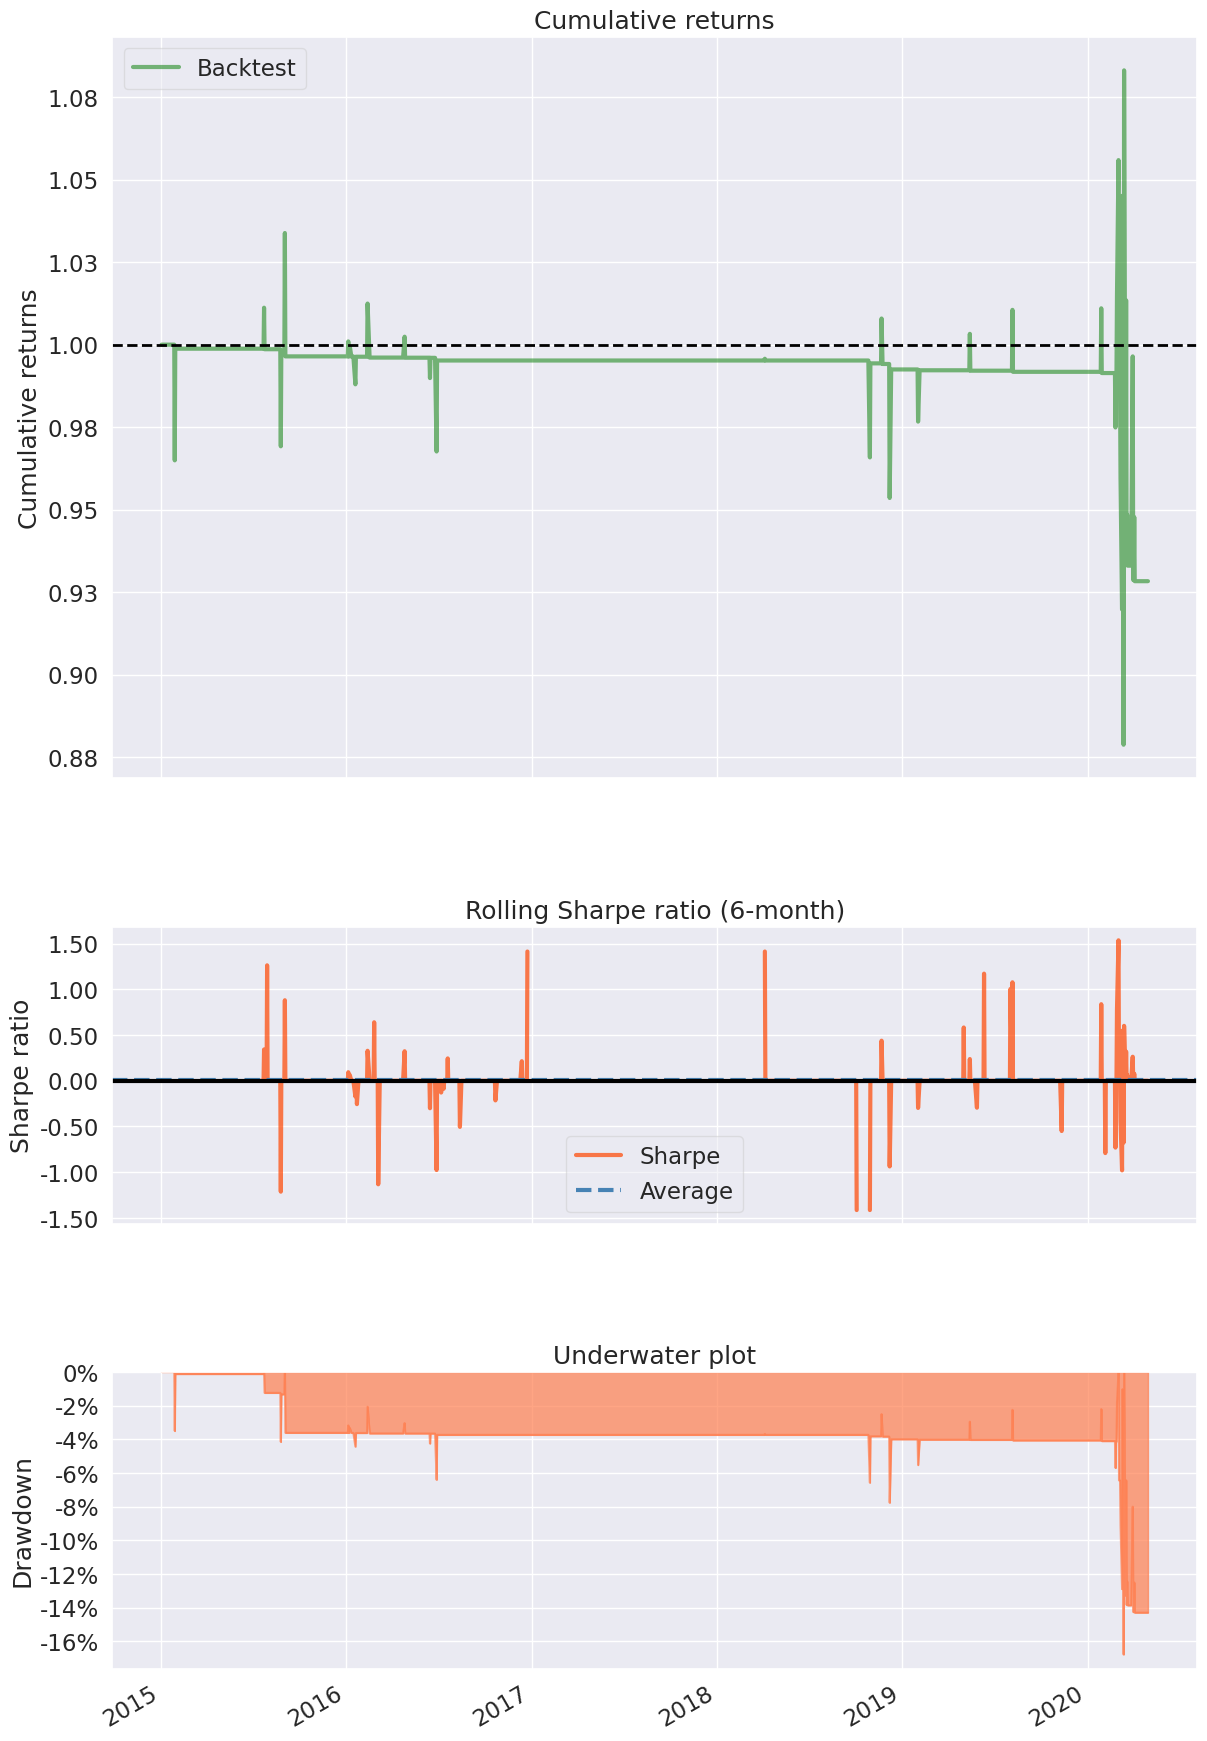

In [11]:
ticker = 'MSFT'
start_date = '2015-01-02'
end_date = '2020-04-30'

# Download historical data for the selected stock
df = yf.download(ticker, start=start_date, end=end_date)
df['bnh_returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# Define the gap-down threshold (e.g., -2%)
gap_down_threshold = -0.02  # -2%

# Identify gap-down days and generate buy signals
df['Gap_Down'] = np.where((df['Open'] < df['Close'].shift(1)) &
                          ((df['Open'] - df['Close'].shift(1)) / df['Close'].shift(1) <= gap_down_threshold), 1, 0)

# Shift the Gap_Down signal to create positions
df['Position'] = df['Gap_Down'].shift(1)

# Calculate returns based on the Gap Down strategy
df['strategy_returns'] = df['Position'] * df['bnh_returns']

# Calculate cumulative returns for both buy-and-hold and the Gap Down strategy
df['cumulative_bnh_returns'] = df['bnh_returns'].cumsum().apply(np.exp)
df['cumulative_strategy_returns'] = df['strategy_returns'].cumsum().apply(np.exp)

# Plot cumulative returns for comparison
plt.figure(figsize=(12, 6))
plt.plot(df['cumulative_bnh_returns'], label='Buy-and-Hold Returns', color='blue')
plt.plot(df['cumulative_strategy_returns'], label='Gap Down Strategy Returns', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Gap Down Strategy vs. Buy-and-Hold')
plt.legend()
plt.show()

print("Buy and hold returns:",df['bnh_returns'].cumsum()[-1])
print("Strategy returns:",df['strategy_returns'].cumsum()[-1])
pf.create_simple_tear_sheet(df['strategy_returns'].diff())
